In [1]:
#Aim to predict cases

In [2]:
import warnings
warnings.filterwarnings('ignore') #remove unnecessary warning
import pandas as pd #data read
import numpy as np  #numerical calculation
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
covid = pd.read_csv('covid_19_india.csv')

In [4]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [29]:
covid['State/UnionTerritory'].unique

<bound method Series.unique of 0        Kerala
1        Kerala
2        Kerala
3        Kerala
4        Kerala
          ...  
15109       NaN
15110       NaN
15111       NaN
15112       NaN
15113       NaN
Name: State/UnionTerritory, Length: 15114, dtype: object>

In [147]:
df = covid.loc[(covid['State/UnionTerritory']=='Tamil Nadu')]

In [148]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
61,62.0,2020-03-07,6:00 PM,Tamil Nadu,1,0,0.0,0.0,1.0
67,68.0,2020-03-08,6:00 PM,Tamil Nadu,1,0,0.0,0.0,1.0
79,80.0,2020-03-09,6:00 PM,Tamil Nadu,1,0,0.0,0.0,1.0
94,95.0,2020-03-10,6:00 PM,Tamil Nadu,1,0,0.0,0.0,1.0
105,106.0,2020-03-11,6:00 PM,Tamil Nadu,1,0,0.0,0.0,1.0


In [149]:
import plotly.offline as py
import plotly.graph_objs as go

In [150]:
cured_rate = go.Scatter(x=df['Date'],y=df['Cured'],name='Cured rate')
death_rate = go.Scatter(x=df['Date'],y=df['Deaths'],name='death rate')
py.iplot([cured_rate,death_rate])

In [151]:
df1 = df['Confirmed']
type(df1)

pandas.core.series.Series

In [152]:
df1

61             1.0
67             1.0
79             1.0
94             1.0
105            1.0
           ...    
14936    1531377.0
14972    1565035.0
15008    1598216.0
15044    1631291.0
15080    1664350.0
Name: Confirmed, Length: 439, dtype: float64

In [153]:
##df1=df1.values
df1=df1.to_numpy(dtype='int32') #series to array
type(df1)

numpy.ndarray

In [154]:
df1

array([      1,       1,       1,       1,       1,       1,       1,
             1,       1,       1,       1,       1,       2,       3,
             3,       7,       9,      15,      18,      26,      29,
            40,      49,      67,      74,     234,     234,     309,
           411,     485,     571,     621,     690,     738,     834,
           911,     969,    1075,    1173,    1204,    1242,    1267,
          1323,    1372,    1477,    1520,    1596,    1629,    1683,
          1755,    1821,    1885,    1937,    2058,    2162,    2323,
          2526,    2757,    3023,    3550,    4058,    4829,    5409,
          6009,    6535,    7204,    8002,    8718,    9227,    9674,
         10108,   10585,   11224,   11760,   12448,   13191,   13967,
         14753,   15512,   16277,   17082,   17728,   18545,   19372,
         20246,   21184,   22333,   23495,   24586,   25872,   27256,
         28694,   30152,   31667,   33229,   34914,   36841,   38716,
         40698,   42

In [155]:
train_size = int(len(df1)*0.80)     
test_size  = len(df1) - train_size  

In [156]:
train , test = df1[0:train_size],df1[train_size:len(df1)]

In [157]:
def create_dataset(dataset,look_back=1):
    datax,datay=[],[]
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back)]
        datax.append(a)
        datay.append(dataset[i+look_back])
    return np.array(datax),np.array(datay)
    

In [158]:
look_back=2
trainx,trainy = create_dataset(train,look_back=look_back)
testx,testy = create_dataset(test,look_back=look_back)

In [159]:
trainx

array([[     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      1],
       [     1,      2],
       [     2,      3],
       [     3,      3],
       [     3,      7],
       [     7,      9],
       [     9,     15],
       [    15,     18],
       [    18,     26],
       [    26,     29],
       [    29,     40],
       [    40,     49],
       [    49,     67],
       [    67,     74],
       [    74,    234],
       [   234,    234],
       [   234,    309],
       [   309,    411],
       [   411,    485],
       [   485,    571],
       [   571,    621],
       [   621,    690],
       [   690,    738],
       [   738,    834],
       [   834,    911],
       [   911,    969],
       [   969,   1075],
       [  1075,   1173],
       [  1173,   1204],
       [  1204,   1242],


In [160]:
testy
testy.dtype

dtype('int32')

In [172]:
from sklearn.linear_model import LinearRegression

In [173]:
model= LinearRegression()

In [174]:
model.fit(trainx,trainy)

LinearRegression()

In [175]:
predict1=model.predict(testx)

In [179]:
predict1.dtype='float'
type(predict1)

numpy.ndarray

In [180]:
predict1

array([ 848693.30857865,  849139.27514104,  849574.25091312,
        850058.16470427,  850529.11463902,  851024.04186042,
        851514.98796066,  851986.96044654,  852455.92908251,
        852905.91381322,  853421.81241318,  853896.78463261,
        854500.60543873,  855081.51473103,  855653.45363715,
        856198.42787212,  856780.34942467,  856212.57106347,
        857553.07083559,  859590.48194636,  859626.83723406,
        860449.63241486,  861362.39284588,  862260.24928526,
        863282.99788829,  864315.81558116,  865500.50863241,
        866899.06330273,  868233.85005668,  869714.52093462,
        871203.28166178,  873037.70910655,  874959.24408216,
        877121.65680237,  879328.2179197 ,  881626.7976222 ,
        883990.41271516,  886395.06944652,  889210.33155167,
        892264.57037152,  896026.26263792,  899627.62164562,
        903343.01374994,  907105.49223965,  910723.22647252,
        915049.14032571,  919614.13791875,  926217.15342209,
        932752.44494848,

In [182]:
df = pd.DataFrame({'Actual output':testy.flatten(),'Predicted':predict1.flatten()})
df

,Actual output,Predicted
0,848724,8.486933e+05
1,849166,8.491393e+05
2,849629,8.495743e+05
3,850096,8.500582e+05
4,850577,8.505291e+05
...,...,...
80,1499485,1.499066e+06
81,1531377,1.529950e+06
82,1565035,1.563107e+06
83,1598216,1.598524e+06


<AxesSubplot:>

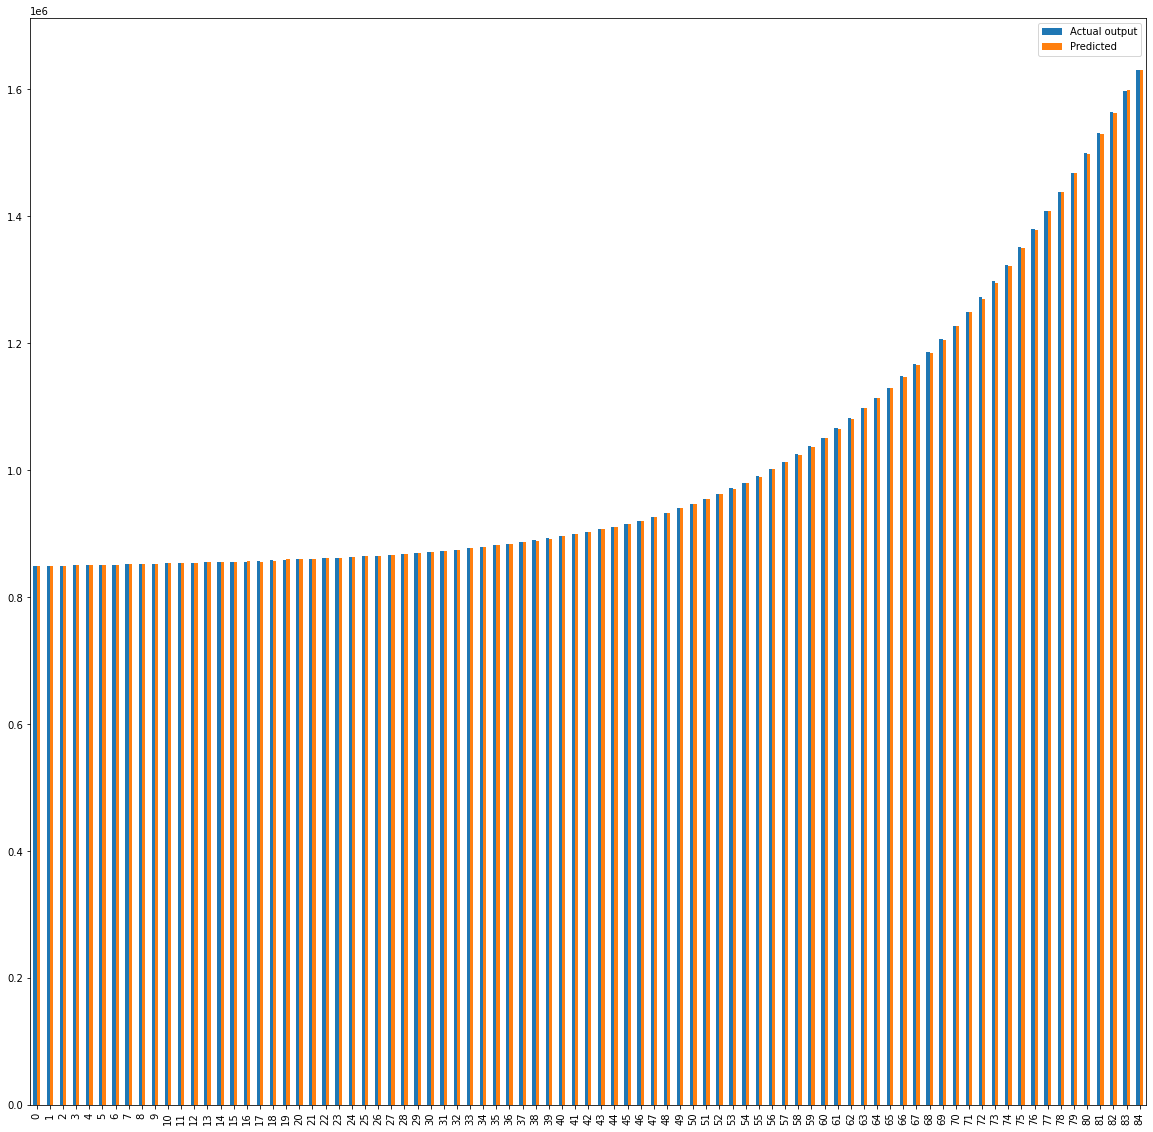

In [183]:
df.plot(kind='bar',figsize=(20,20))